# House Price Current[Replace with Date when File]
## Version: Current[Replace with Version when File]




In [631]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import scipy


In [632]:
original_train = pd.read_csv("https://luo200105.github.io/DataHost/IN3007/Original_train.csv")
original_test = pd.read_csv("https://luo200105.github.io/DataHost/IN3007/Original_test.csv")
sample_submission = pd.read_csv("https://luo200105.github.io/DataHost/IN3007/sample_submission.csv")

In [633]:
print(original_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [634]:
print(original_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

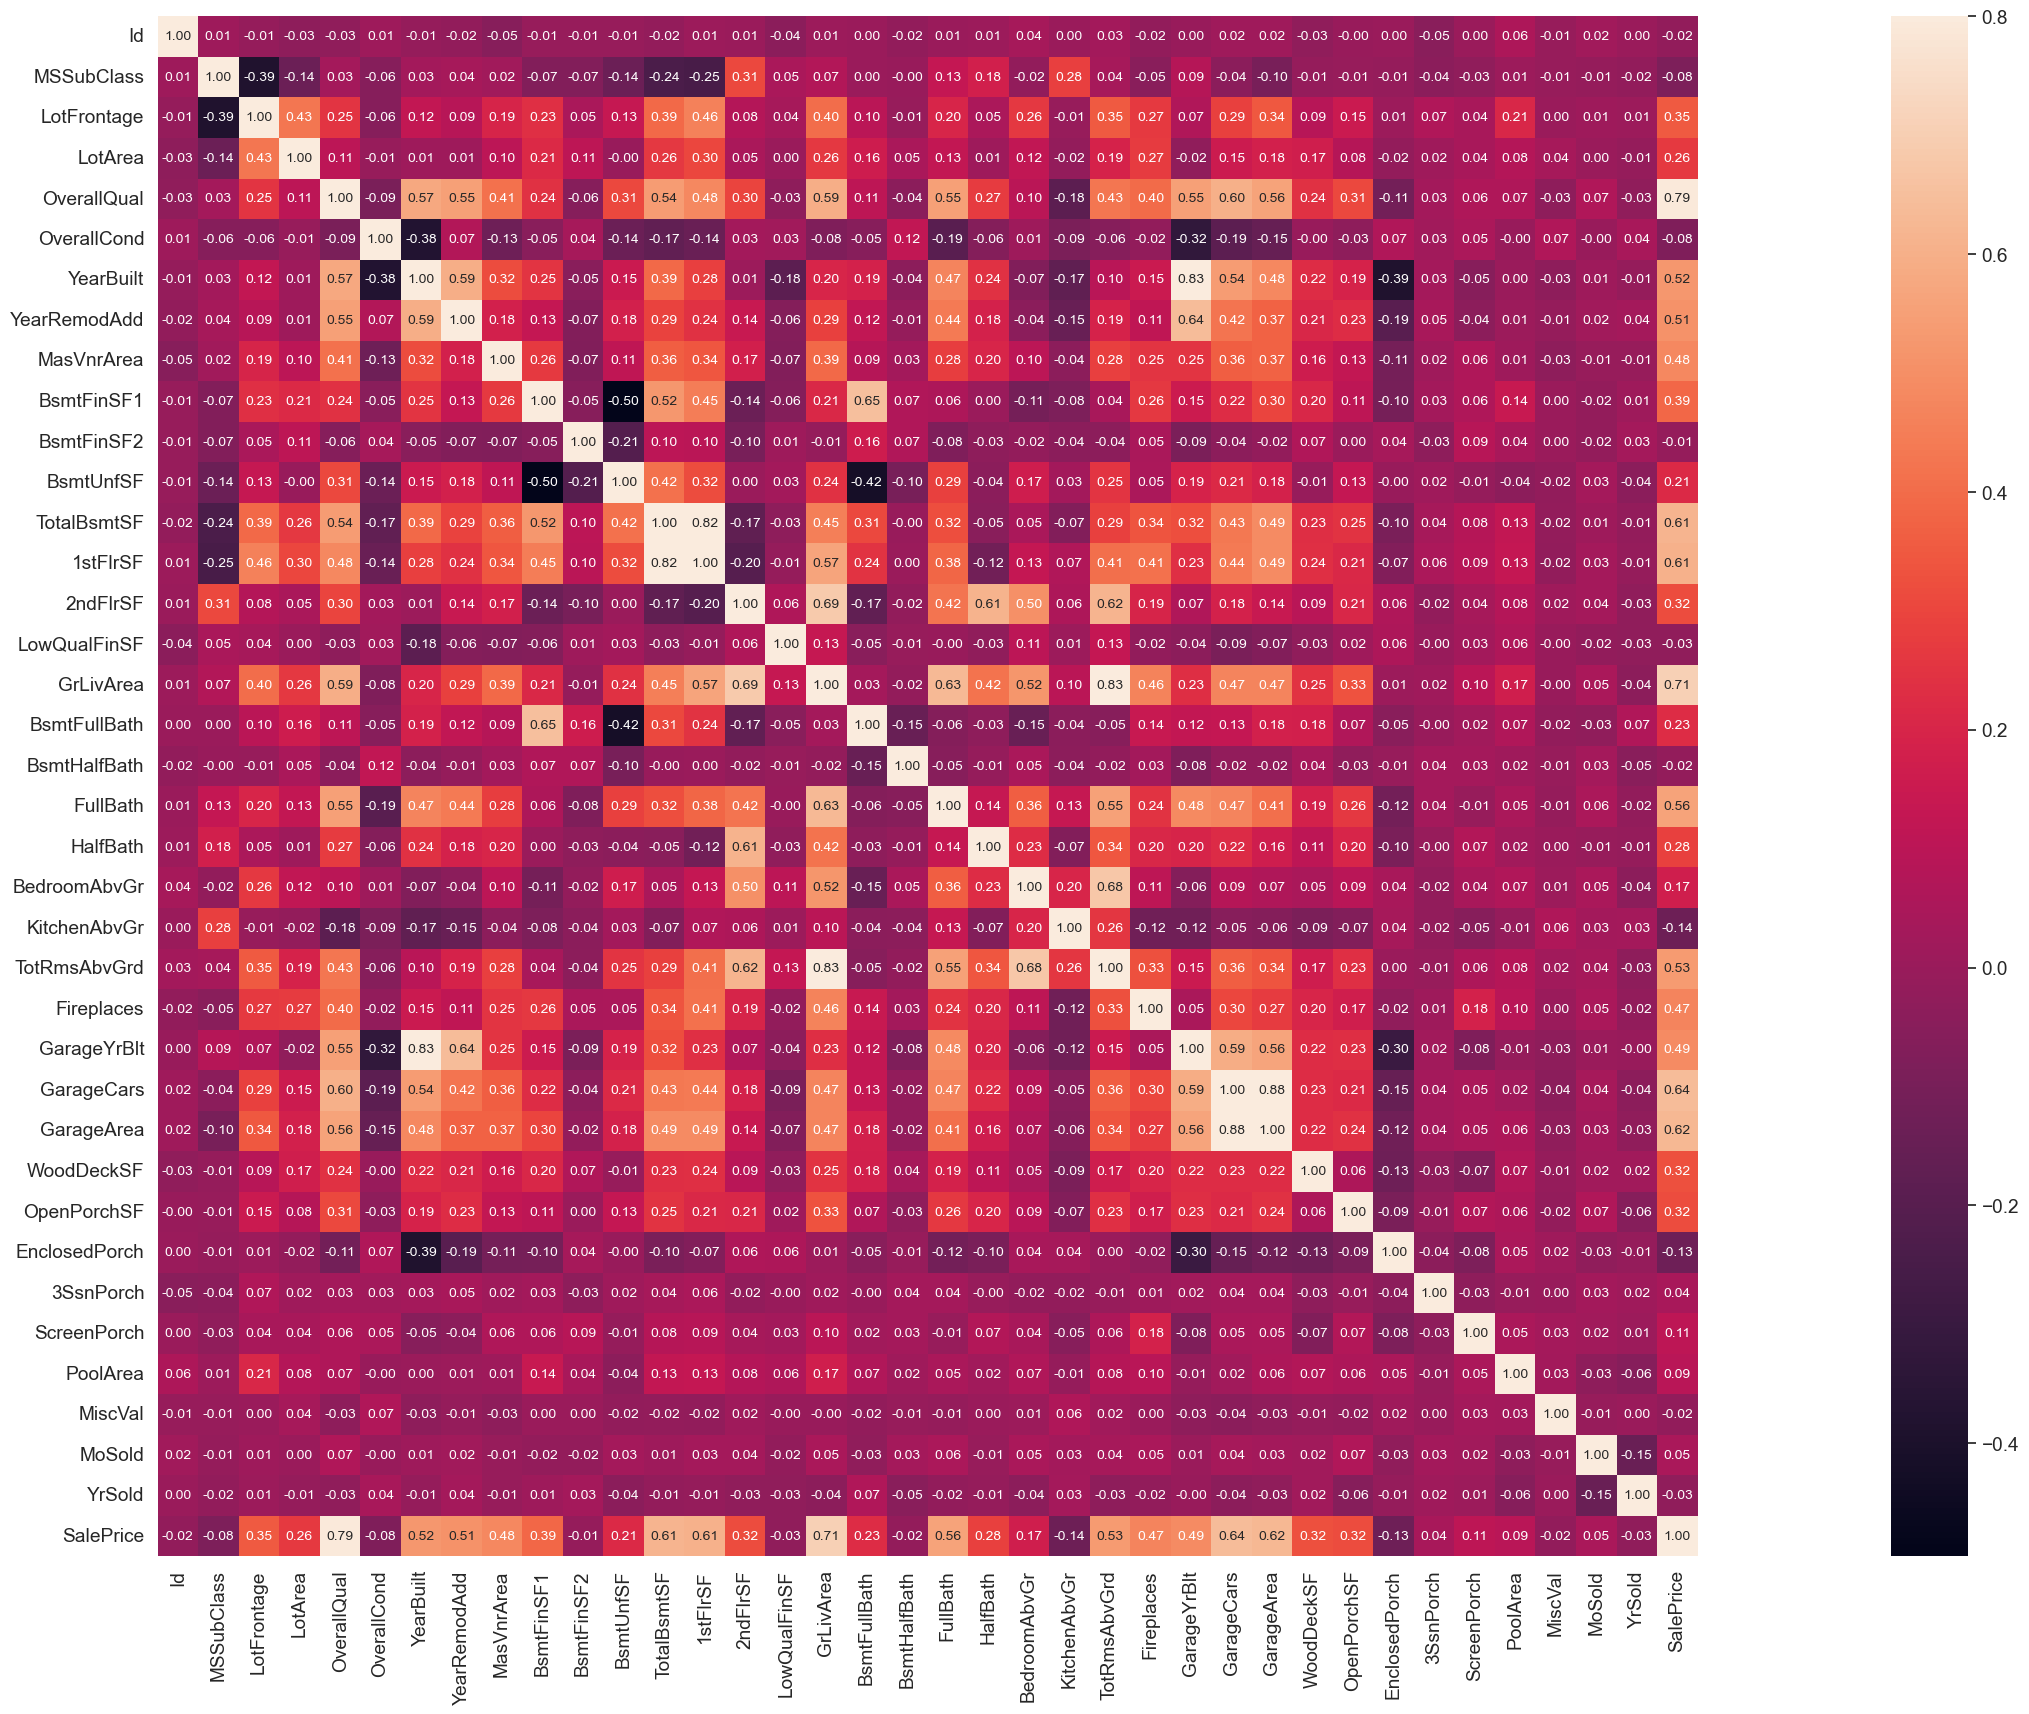

In [635]:
#correlation matrix
corrmat_train = original_train.corr()
f, ax = plot.subplots(figsize=(50, 20))
sns.heatmap(corrmat_train, vmax=.8, square=True, annot=True, fmt='.2f', annot_kws={'size': 10});

In [636]:
# find out correlation between SalePrice and other variables >0.25
print(corrmat_train[corrmat_train['SalePrice']>0.25].index)

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice'],
      dtype='object')


In [637]:
#Only keep the variables with correlation >0.25
train_25 = original_train[['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
                        'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                        'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces',
                        'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                        'SalePrice']]
test_25 = original_test[['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
                      'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                      'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces',
                      'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]
test = original_test[['Id','LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
                      'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                      'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces',
                      'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]
# refresh the correlation matrix
corrmat_train = train_25.corr()

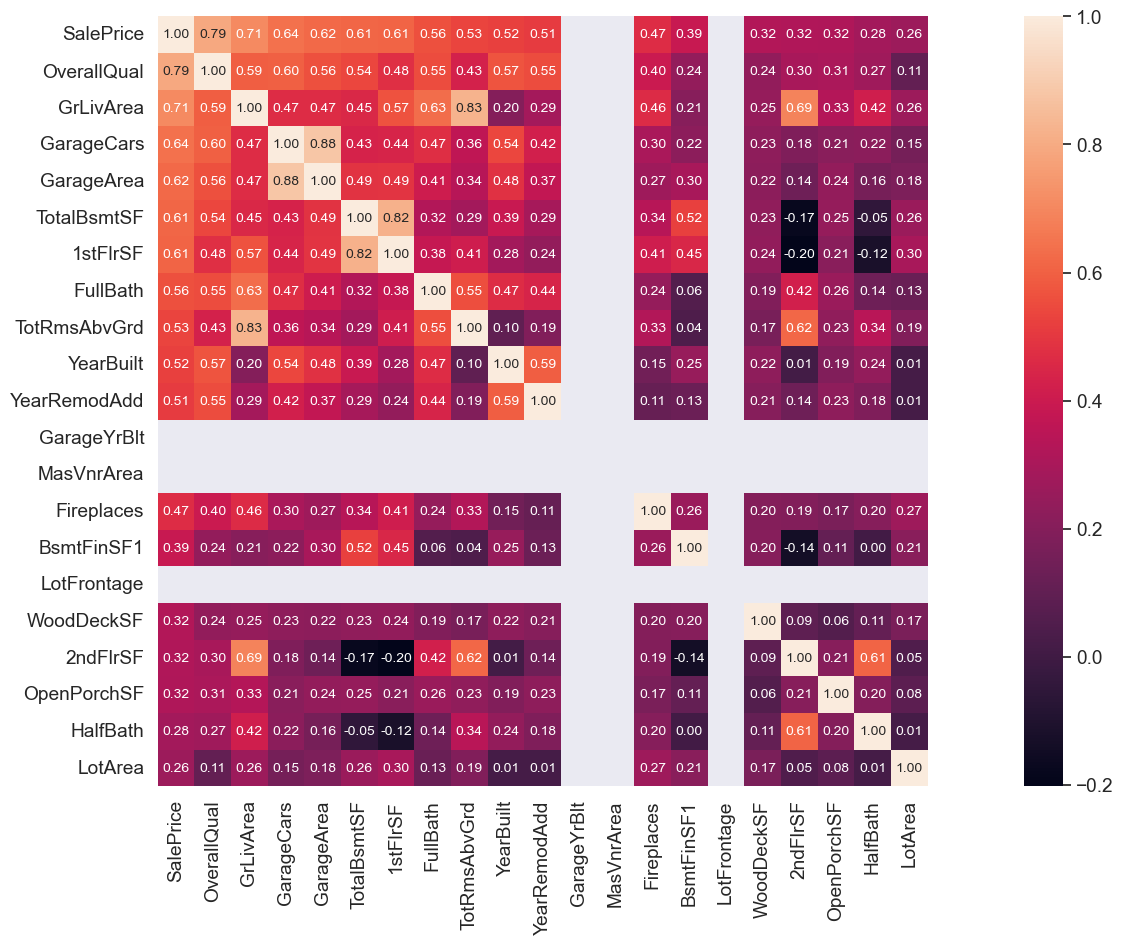

In [638]:
#saleprice correlation matrix
k = 21
cols = corrmat_train.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_25[cols].values.T)
f, ax = plot.subplots(figsize=(25, 10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plot.show()
# Shows the correlation between the top 20 variables and SalePrice
# the most correlated variable is OverallQual

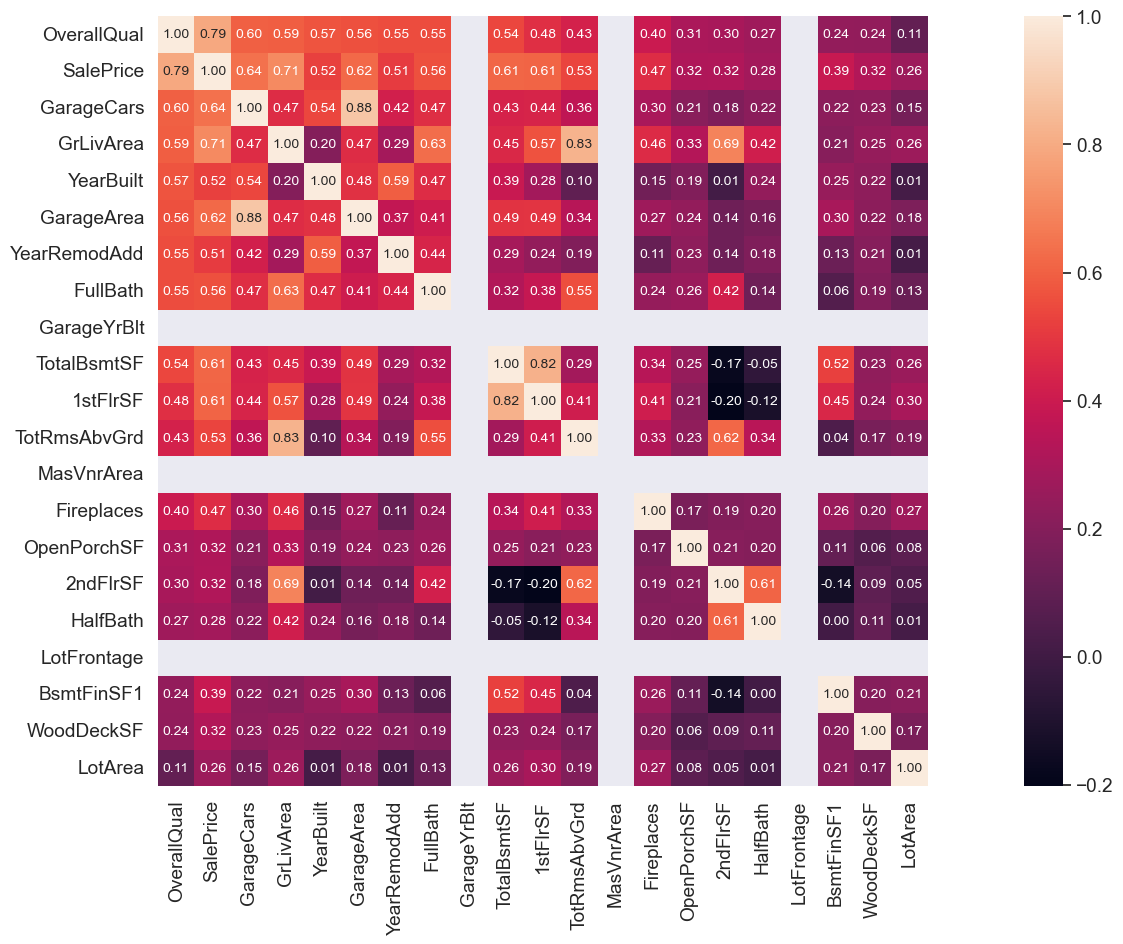

In [639]:
# Overall quality correlation matrix
k = 21
cols = corrmat_train.nlargest(k, 'OverallQual')['OverallQual'].index
cm = np.corrcoef(train_25[cols].values.T)
f, ax = plot.subplots(figsize=(25 , 10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plot.show()

In [640]:
train_25.isnull().sum().sort_values(ascending=False).head(20)
# drop the columns with more than 259 missing values in the training set

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
FullBath          0
OpenPorchSF       0
WoodDeckSF        0
GarageArea        0
GarageCars        0
Fireplaces        0
TotRmsAbvGrd      0
HalfBath          0
GrLivArea         0
LotArea           0
2ndFlrSF          0
1stFlrSF          0
TotalBsmtSF       0
BsmtFinSF1        0
YearRemodAdd      0
YearBuilt         0
OverallQual       0
dtype: int64

In [641]:
test_25.isnull().sum().sort_values(ascending=False).head(20)

LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
GarageArea        1
GarageCars        1
BsmtFinSF1        1
TotalBsmtSF       1
HalfBath          0
WoodDeckSF        0
Fireplaces        0
TotRmsAbvGrd      0
GrLivArea         0
FullBath          0
LotArea           0
2ndFlrSF          0
1stFlrSF          0
YearRemodAdd      0
YearBuilt         0
OverallQual       0
OpenPorchSF       0
dtype: int64

In [642]:
# We can see that there are a lot of missing values in the dataset
# Filled in with mean
train_25['GarageYrBlt']=train_25['GarageYrBlt'].fillna(train_25['GarageYrBlt'].mean())
train_25['MasVnrArea']=train_25['MasVnrArea'].fillna(train_25['MasVnrArea'].mean())
train_25['LotFrontage']=train_25['LotFrontage'].fillna(train_25['LotFrontage'].mean())
train_25.isnull().sum().sort_values(ascending=False).head(20)

C:\Users\kangk\AppData\Local\Temp\ipykernel_51860\1034406397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_25['GarageYrBlt']=train_25['GarageYrBlt'].fillna(train_25['GarageYrBlt'].mean())
C:\Users\kangk\AppData\Local\Temp\ipykernel_51860\1034406397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_25['MasVnrArea']=train_25['MasVnrArea'].fillna(train_25['MasVnrArea'].mean())
C:\Users\kangk\AppData\Local\Temp\ipykernel_51860\1034406397.py:5: SettingWithCopyWarning: 
A value is trying to be

LotFrontage     0
FullBath        0
OpenPorchSF     0
WoodDeckSF      0
GarageArea      0
GarageCars      0
GarageYrBlt     0
Fireplaces      0
TotRmsAbvGrd    0
HalfBath        0
GrLivArea       0
LotArea         0
2ndFlrSF        0
1stFlrSF        0
TotalBsmtSF     0
BsmtFinSF1      0
MasVnrArea      0
YearRemodAdd    0
YearBuilt       0
OverallQual     0
dtype: int64

In [643]:
#do the same thing to the test_25 set
test_25['GarageYrBlt']=test_25['GarageYrBlt'].fillna(test_25['GarageYrBlt'].mean())
test_25['MasVnrArea']=test_25['MasVnrArea'].fillna(test_25['MasVnrArea'].mean())
test_25['LotFrontage']=test_25['LotFrontage'].fillna(test_25['LotFrontage'].mean())
test_25['GarageArea']=test_25['GarageArea'].fillna(test_25['GarageArea'].mean())
test_25['GarageCars']=test_25['GarageCars'].fillna(test_25['GarageCars'].mean())
test_25['TotalBsmtSF']=test_25['TotalBsmtSF'].fillna(test_25['TotalBsmtSF'].mean())
test_25['BsmtFinSF1']=test_25['BsmtFinSF1'].fillna(test_25['BsmtFinSF1'].mean())
test_25.isnull().sum().sort_values(ascending=False).head(20)

C:\Users\kangk\AppData\Local\Temp\ipykernel_51860\941334174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_25['GarageYrBlt']=test_25['GarageYrBlt'].fillna(test_25['GarageYrBlt'].mean())
C:\Users\kangk\AppData\Local\Temp\ipykernel_51860\941334174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_25['MasVnrArea']=test_25['MasVnrArea'].fillna(test_25['MasVnrArea'].mean())
C:\Users\kangk\AppData\Local\Temp\ipykernel_51860\941334174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

LotFrontage     0
LotArea         0
WoodDeckSF      0
GarageArea      0
GarageCars      0
GarageYrBlt     0
Fireplaces      0
TotRmsAbvGrd    0
HalfBath        0
FullBath        0
GrLivArea       0
2ndFlrSF        0
1stFlrSF        0
TotalBsmtSF     0
BsmtFinSF1      0
MasVnrArea      0
YearRemodAdd    0
YearBuilt       0
OverallQual     0
OpenPorchSF     0
dtype: int64

In [644]:
#do the same thing to the test set
test['GarageYrBlt']=test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())
test['MasVnrArea']=test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['LotFrontage']=test['LotFrontage'].fillna(test['LotFrontage'].mean())
test['GarageArea']=test['GarageArea'].fillna(test['GarageArea'].mean())
test['GarageCars']=test['GarageCars'].fillna(test['GarageCars'].mean())
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test.isnull().sum().sort_values(ascending=False).head(20)

C:\Users\kangk\AppData\Local\Temp\ipykernel_51860\747161825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['GarageYrBlt']=test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())
C:\Users\kangk\AppData\Local\Temp\ipykernel_51860\747161825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['MasVnrArea']=test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
C:\Users\kangk\AppData\Local\Temp\ipykernel_51860\747161825.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

Id              0
GrLivArea       0
WoodDeckSF      0
GarageArea      0
GarageCars      0
GarageYrBlt     0
Fireplaces      0
TotRmsAbvGrd    0
HalfBath        0
FullBath        0
2ndFlrSF        0
LotFrontage     0
1stFlrSF        0
TotalBsmtSF     0
BsmtFinSF1      0
MasVnrArea      0
YearRemodAdd    0
YearBuilt       0
OverallQual     0
LotArea         0
dtype: int64

In [645]:
# Try to drop the outliers
#drop = train_25.index[(np.abs(train_25['SalePrice'] - train_25['SalePrice'].mean()) >= (1*train_25['SalePrice'].std()))]
#train_25 = train_25.drop(drop)

In [646]:
#split the training set
X_train, X_test, y_train, y_test = train_test_split(train_25.drop('SalePrice', axis=1), train_25['SalePrice'], test_size=0.2, random_state=59)
# standardize the data
sc_std = preprocessing.StandardScaler()
sc_std_result = preprocessing.StandardScaler()
X_train_std = sc_std.fit_transform(X_train)
X_test_std = sc_std.fit_transform(X_test)
y_train_std = sc_std.fit_transform(y_train.values.reshape(-1, 1))
y_test_std = sc_std_result.fit_transform(y_test.values.reshape(-1, 1))
X_train_std.shape

(1168, 20)

In [647]:
# try SVM regression
svr = SVR(kernel='rbf', gamma='auto')
svr.fit(X_train_std, y_train_std)

C:\Users\kangk\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(gamma='auto')

In [648]:
svr_pred = svr.predict(X_test_std).reshape(-1, 1)
result = sc_std_result.inverse_transform(svr_pred)
y_test_std = sc_std_result.inverse_transform(y_test_std)
print(np.sqrt(mean_squared_error(y_test_std, result)))

30240.717007823656


In [649]:
# output the result
result_Id = pd.DataFrame(test['Id'], columns=['Id'])
test_std = sc_std.fit_transform(test)

In [650]:
result = svr.predict(sc_std.fit_transform(test_25)).reshape(-1, 1)
result = sc_std_result.inverse_transform(result)
print(result)

[[127721.76217829]
 [168253.73012314]
 [197492.55418391]
 ...
 [199666.4672562 ]
 [121821.44586687]
 [233232.44280681]]


In [651]:
result_Value = pd.DataFrame(result, columns=['SalePrice'])
result = pd.concat([result_Id, result_Value], axis=1)
result.to_csv('result.csv', index=False)

# RMSPE: 0.16321 on SVM regression rbf kernel
# 0.18101 on SVM regression linear kernel
# 0.23 on SVM regression linear kernel with no outliers
# remove the outliers can not improve the result

In [652]:
# calculate the rmse with the sample submission
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [653]:
sample_Value = sample_submission['SalePrice']
sample_Value = sample_Value.values.reshape(-1, 1)
print(sample_Value)

[[169277.0524984 ]
 [187758.39398877]
 [183583.68356955]
 ...
 [219222.42340006]
 [184924.279659  ]
 [187741.86665748]]


In [654]:
rmse = np.sqrt(mean_squared_error(sample_Value, result))

ValueError: y_true and y_pred have different number of output (1!=2)

In [ ]:
print(rmse)

In [ ]:
rmspe = np.sqrt(np.mean(np.square((sample_Value - result) / sample_Value)))


In [ ]:
print(rmspe)